# KNN
## Classification

In [126]:
import pandas as pd
file_name='fruit_data_with_colors.txt'
df = pd.read_table(file_name)
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


### Plot a scatter matrix

<IPython.core.display.Javascript object>


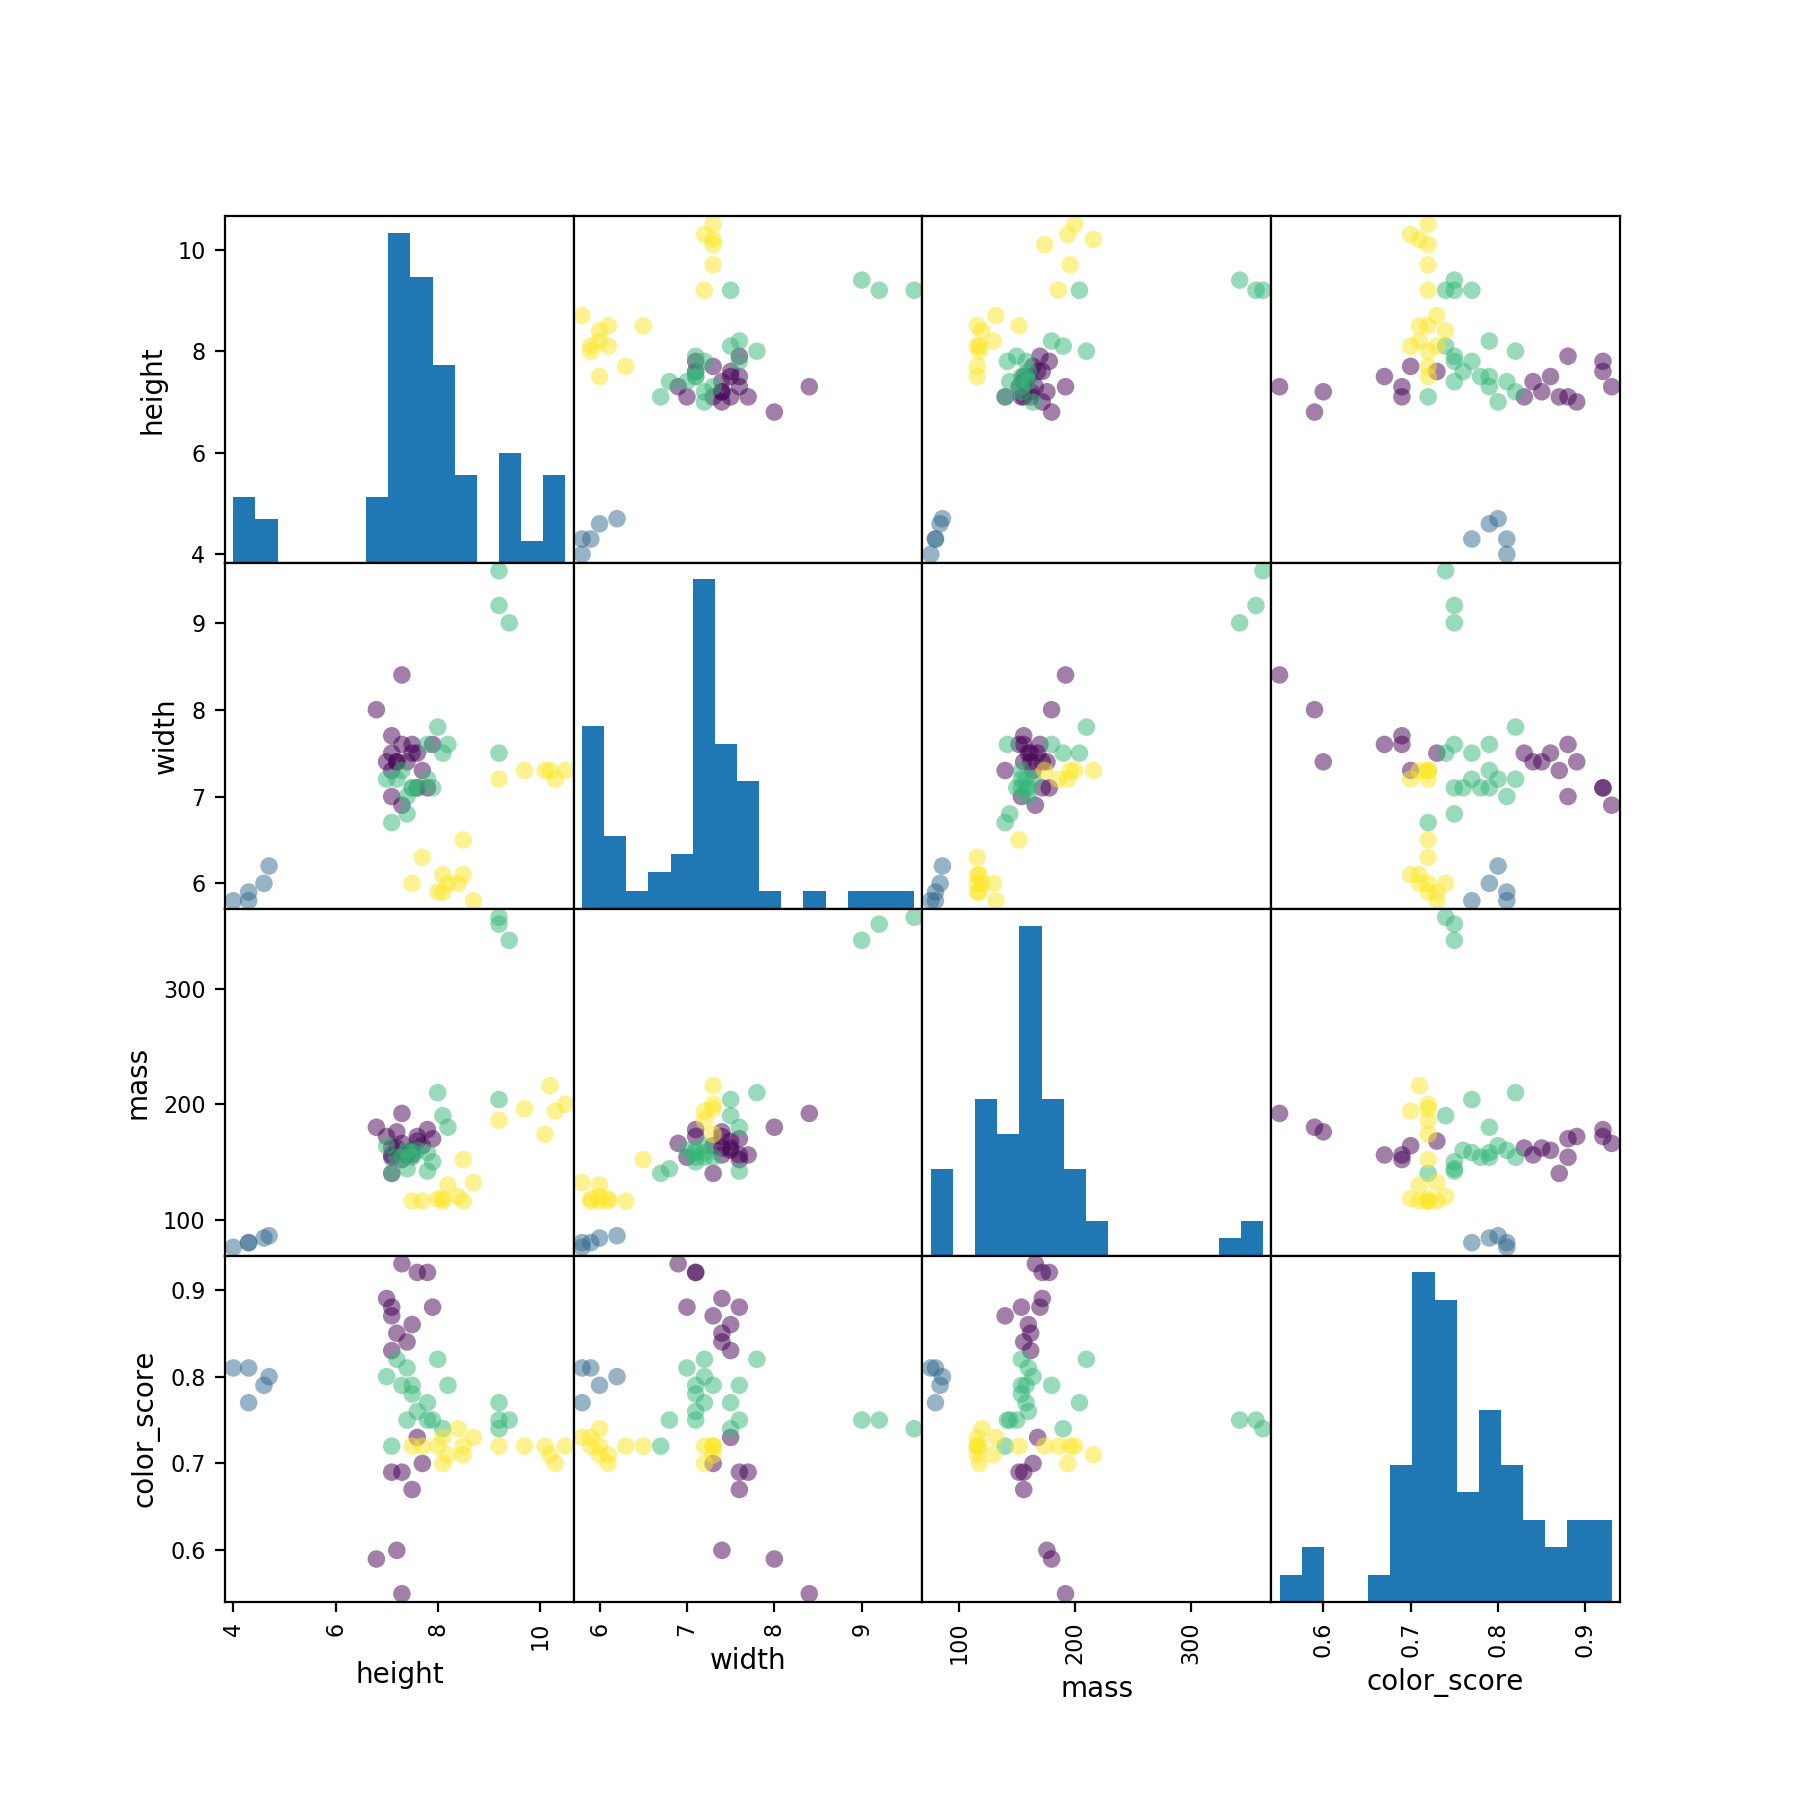

In [127]:
# from matplotlib import cm
# cmap = cm.get_cmap('gnuplot')
import matplotlib.pyplot as plt
%matplotlib notebook

X = df[['height', 'width', 'mass', 'color_score']]
y = df['fruit_label']

scatter = pd.plotting.scatter_matrix(X, c= y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9))#, cmap=cmap)

<IPython.core.display.Javascript object>


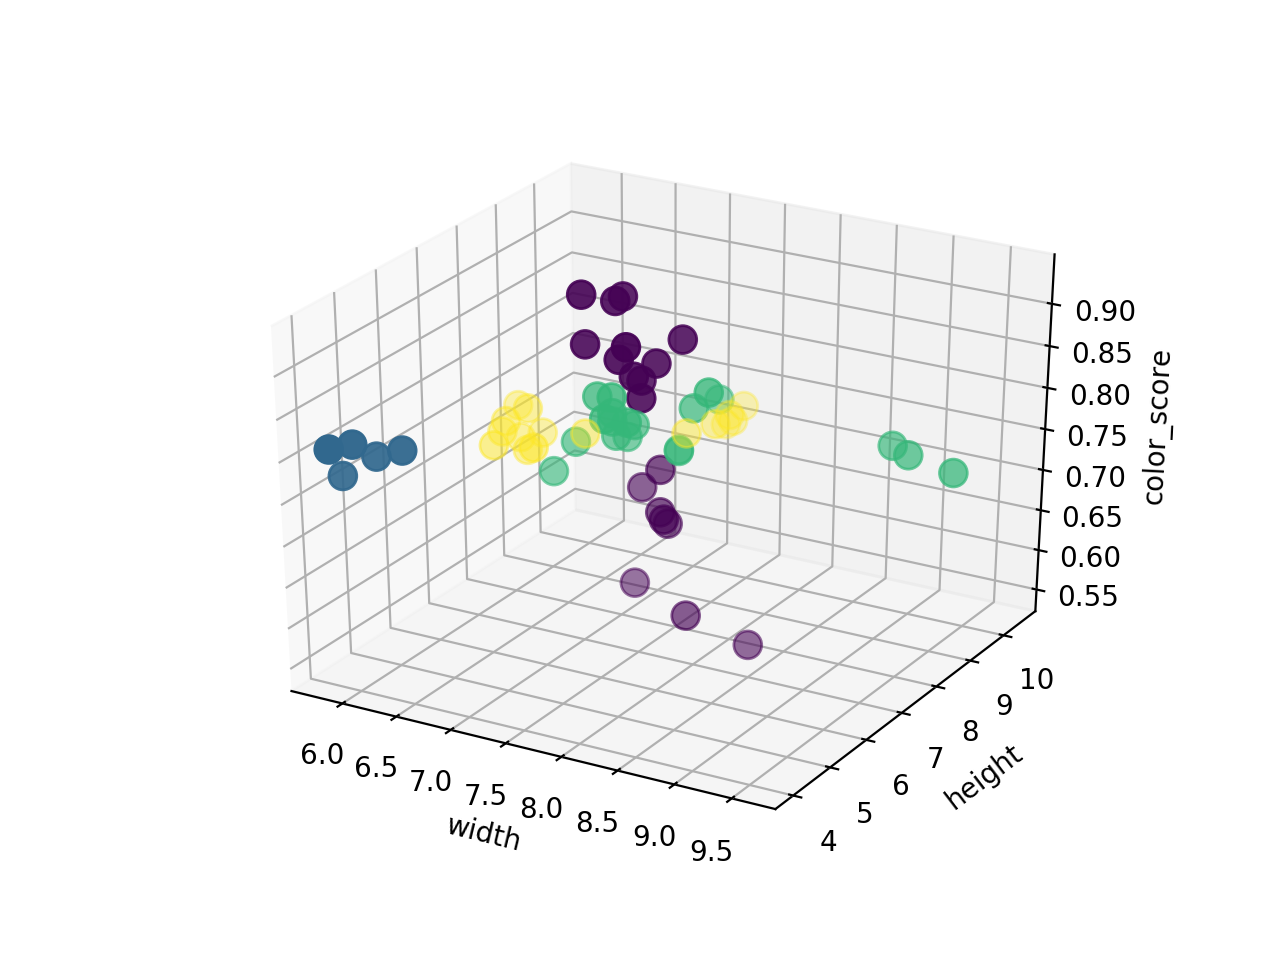

In [128]:
# plotting za 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X['width'], X['height'], X['color_score'], c = y, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Print general information about data

In [129]:
import ML_mst as mst # -> ML_mst
mst.print_df_info(df,column_values_count ='fruit_name') # print general information about data

Len = 59, shape= (59, 7), columns = ['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height', 'color_score'],
   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79
  fruit_name  count
0      apple     19
1     orange     19
2      lemon     16
3   mandarin      5


#### Note: most samples are almost sorted by label thus need to shuffle before split 

### shuffle data 
Note: you may skip shuffle in case using from sklearn.model_selection import train_test_split

In [130]:

# you may skip shuffle in case using from sklearn.model_selection import train_test_split

df = df.sample(frac=1) # shuffle  # alternative # from sklearn.utils import shuffle 
mst.print_df_info(df,column_values_count ='fruit_name') # print general information about data

Len = 59, shape= (59, 7), columns = ['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height', 'color_score'],
    fruit_label fruit_name     fruit_subtype  mass  width  height  color_score
34            3     orange      turkey_navel   142    7.6     7.8         0.75
54            4      lemon           unknown   116    6.1     8.5         0.71
18            1      apple       cripps_pink   162    7.5     7.1         0.83
17            1      apple  golden_delicious   168    7.5     7.6         0.73
43            4      lemon    spanish_belsan   194    7.2    10.3         0.70
  fruit_name  count
0      apple     19
1     orange     19
2      lemon     16
3   mandarin      5


### Split to train and test set

In [6]:
from ML_KNN_manual import train_test_split_df # -> custom implementation 
help(train_test_split_df)

Help on function train_test_split_df in module ML_KNN_manual:

train_test_split_df(df, percentage=0.75)
    Splits df into two df
    sample of using
        train_df, test_df = train_test_split_df(df,0.80)
    :param percentage: value from 0 to 1. Default value = 0.75 Returns all df as train if  percentage larger than 1
    :return: tuple of train and test df



In [7]:
train_df, test_df = train_test_split_df(df) # split  df to train and test default value of percentage = 0,75
print ('len(train_df)={:,}'.format(len(train_df)))
print ('len(test_df)={:,}'.format(len(test_df)))

len(train_df)=44
len(test_df)=15


### Prepare features and labels

In [8]:
# select X (features) and y (labels)
X_train = train_df[['mass','width','height','color_score']]
y_train = train_df['fruit_label']
X_test = test_df[['width','height','mass','color_score']]

y_test = test_df['fruit_label']


print ('X_train.shape=', X_train.shape)
print ('y_train.shape=', y_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_test.shape=', y_test.shape)
print ('X_train[0]=')
X_train.iloc[0]


X_train.shape= (44, 4)
y_train.shape= (44,)
X_test.shape= (15, 4)
y_test.shape= (15,)
X_train[0]=


mass           156.00
width            7.40
height           7.40
color_score      0.84
Name: 21, dtype: float64

### Create dict to match label to fruit name 

In [9]:
fruits_dict = dict(zip(df['fruit_label'].unique(), df['fruit_name'].unique()))
print (fruits_dict)


{1: 'apple', 3: 'orange', 4: 'lemon', 2: 'mandarin'}


### Scale features

In [10]:
from ML_KNN_manual import Scaler  # ->  custom implementation 

In [11]:
scaler = Scaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print ('X_train_scaled[0]=')
X_train_scaled.iloc[0]

X_train_scaled[0]=


mass           0.269504
width          0.421053
height         0.500000
color_score    0.763158
Name: 21, dtype: float64

### Train KNN classifier

In [12]:
from ML_KNN_manual import KNN_classifier  # -> custom implementation 

In [13]:
n_neighbors = 5
clf= KNN_classifier(k_number=n_neighbors)
clf.fit(X_train_scaled, y_train)

### Evaluate the model 


In [14]:
print ('score train = {:.3f}'.format(clf.score(X_train_scaled,y_train)))
print ('score test = {:.3f}'.format(clf.score(X_test_scaled,y_test)))

score train = 0.977
score test = 0.933


### Predict

In [15]:
target_observation= pd.Series({'mass': 160,'width': 7,'height':7,'color_score': 0.81})
# target_observation= pd.Series({'mass': 160,'width': 6,'height':4,'color_score': 0.81})
print (target_observation)
target_observation_scaled = scaler.transform(target_observation)
print ('target_observation_scaled=')
target_observation_scaled


mass           160.00
width            7.00
height           7.00
color_score      0.81
dtype: float64
target_observation_scaled=


mass           0.283688
width          0.315789
height         0.435484
color_score    0.684211
dtype: float64

In [16]:
target_observation_label_predicted = clf.predict(target_observation_scaled)
print ('for {} \n\npredicted fruit name = {} [label = {}] '.\
       format(dict(target_observation_scaled), fruits_dict[target_observation_label_predicted ],
              target_observation_label_predicted))


for {'mass': 0.28368794326241137, 'width': 0.31578947368421056, 'height': 0.43548387096774194, 'color_score': 0.6842105263157895} 

predicted fruit name = orange [label = 3] 


### Visualize KNN 

In [25]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


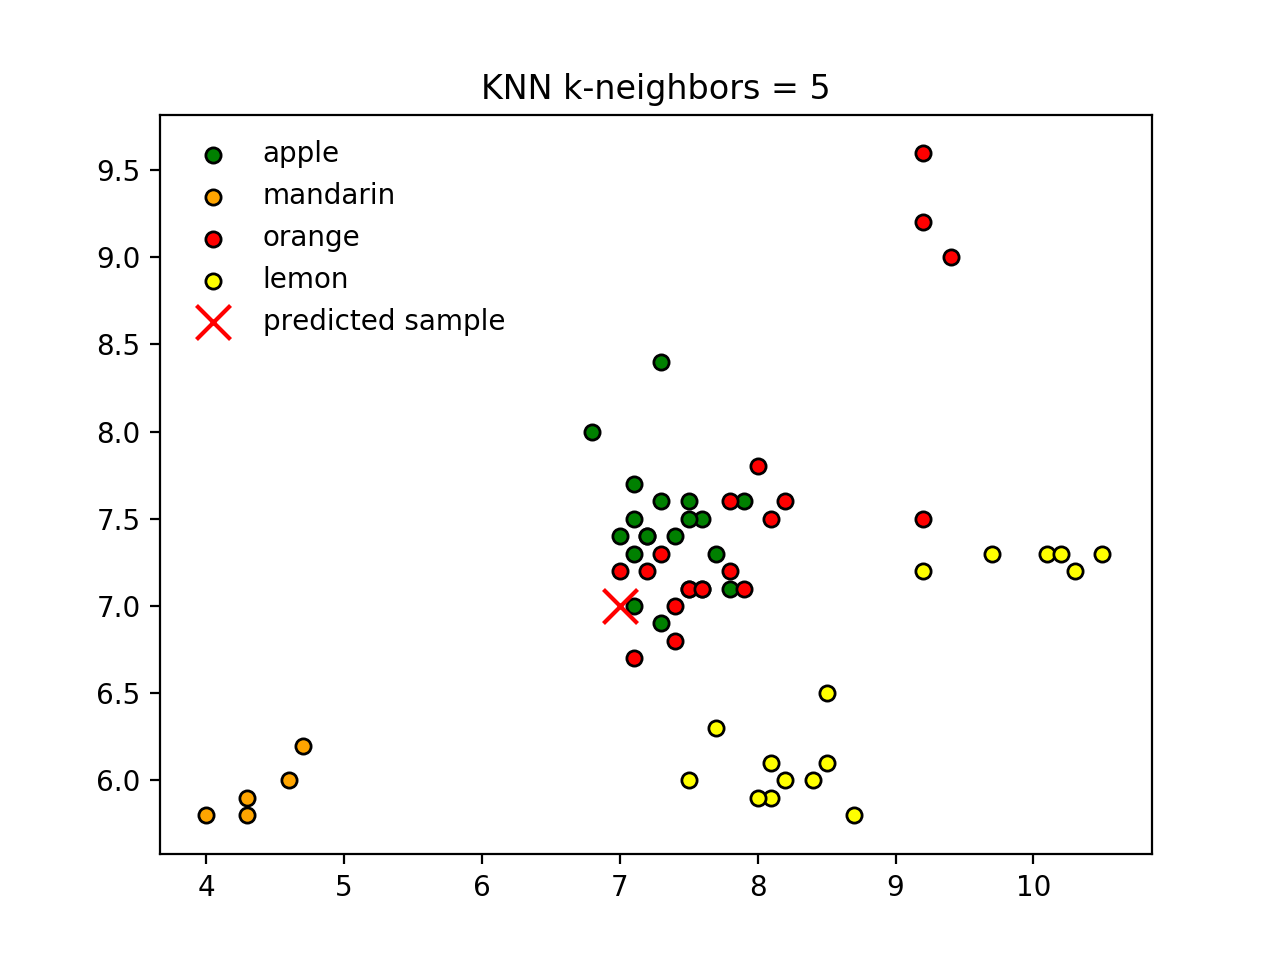

In [26]:
# create new figure
plt.figure() 
# use custom colors
# colors= ['#FF0000', '#00FF00', '#0000FF','#AFAFAF']
colors= ['green', 'orange', 'red','yellow']
# draw all data 
for i in range (len(colors)):
    ind = df['fruit_label']==(i+1)
    plt.scatter(df[ind]['height'], df[ind]['width'], c= colors[i], s=30, label=fruits_dict[i+1], edgecolor = 'black')
# draw target observation    

label_pred_color = colors[target_observation_label_predicted-1] # labels are from 1 but colors are from 0
plt.scatter(target_observation['height'], target_observation['width'],
            c= label_pred_color, s = 150, marker = 'x',label='predicted sample')

# set the title 
plt.title('KNN k-neighbors = {}'.format( n_neighbors))
# add legend 
plt.legend(frameon= False)

### Visualize prediction boundaries 

<IPython.core.display.Javascript object>


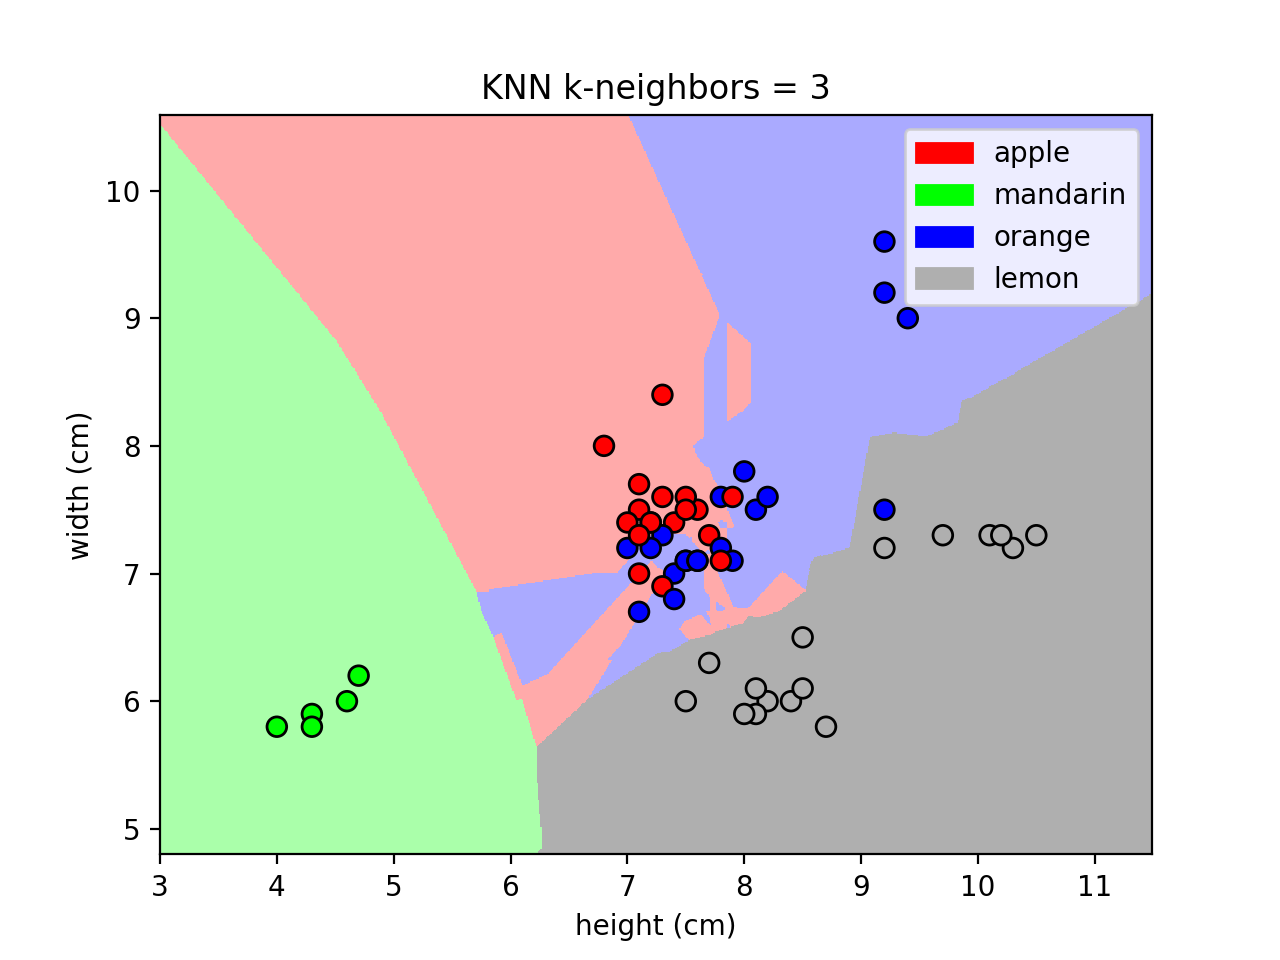

In [27]:
# -> mst.plot_fruit_knn
mst.plot_fruit_knn(df[['width','height']], df['fruit_label'], n_neighbors=3) # keep X_train, y_train as df 

### sklearn implementation

In [29]:
from sklearn.model_selection import train_test_split # sklearn 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print ('X_train.shape=', X_train.shape)
print ('y_train.shape=', y_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_test.shape=', y_test.shape)
print ('X_train[0]=')
X_train.iloc[0]


X_train.shape= (44, 4)
y_train.shape= (44,)
X_test.shape= (15, 4)
y_test.shape= (15,)
X_train[0]=


height           7.20
width            7.20
mass           154.00
color_score      0.82
Name: 42, dtype: float64

### Create classifier object

In [30]:
from sklearn.neighbors import KNeighborsClassifier # sklearn 
knn = KNeighborsClassifier(n_neighbors = 3)

### Train the classifier (fit the estimator) using the training data

In [31]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Estimate the accuracy of the classifier on future data, using the test data

In [32]:
knn.score(X_test, y_test)

0.5333333333333333

#### Note: the accuracy is lower due to missed scaling

In [34]:

from sklearn.preprocessing import StandardScaler # sklearn 
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.9333333333333333

#### Now the score is the same as for manual implementation

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [35]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5, 0.81]])
fruits_dict[fruit_prediction[0]]

'orange'

In [36]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5, 0]])
fruits_dict[fruit_prediction[0]]

'lemon'

### synthetic dataset for classification (binary) 

<IPython.core.display.Javascript object>


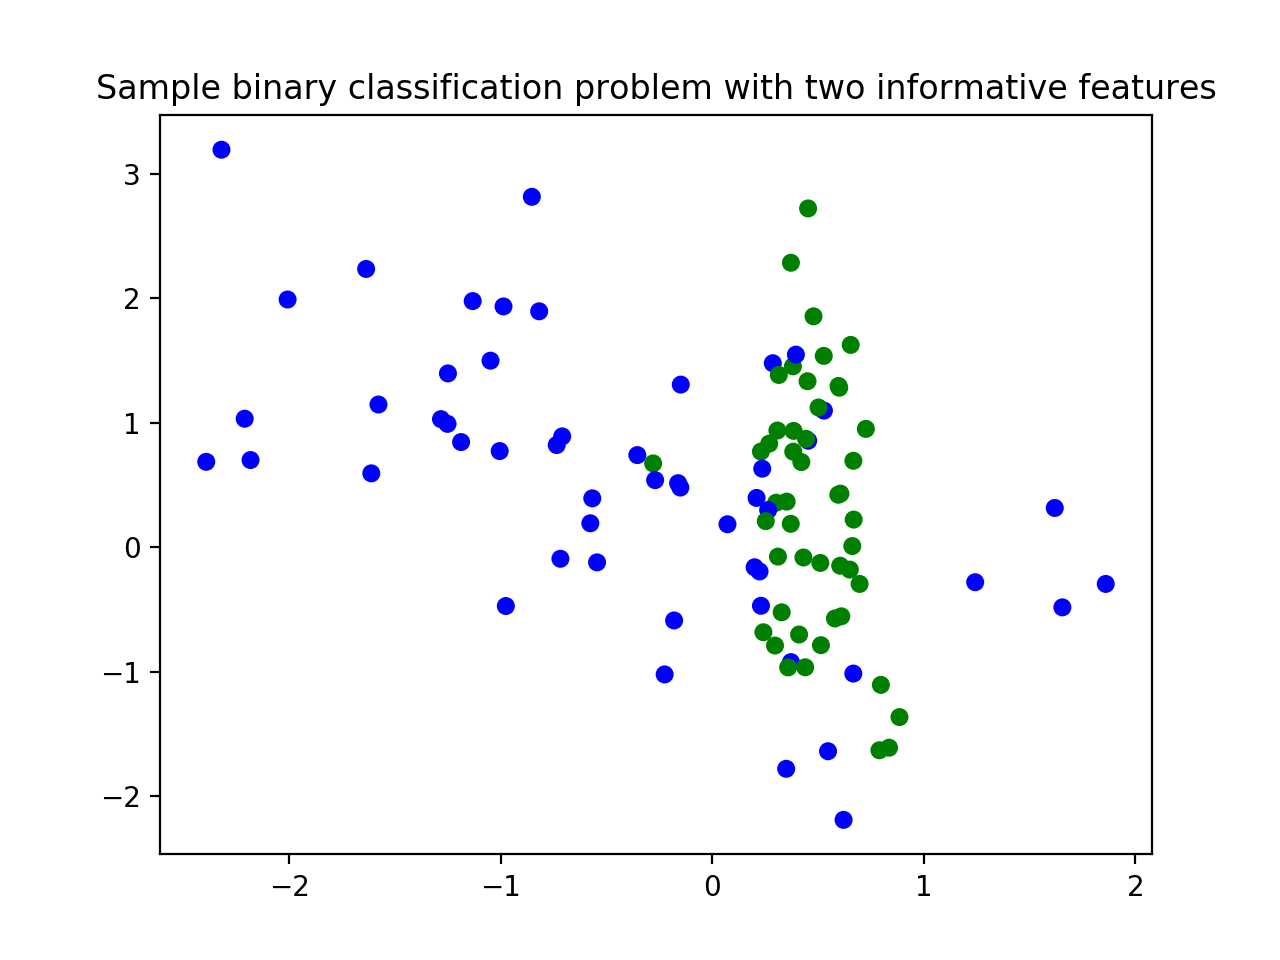

In [30]:
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])
plt.figure()

plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=30,cmap=cmap_bold);

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

In [7]:

from sklearn.preprocessing import MinMaxScaler
def normalize(X_train, X_test):
        scaler= MinMaxScaler()
        X_train_scaled= scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled  = normalize(X_train, X_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier # sklearn 
import ML_mst as mst

%matplotlib notebook

In [27]:

score = clf.score (X_test_scaled, y_test)
'KNN classification K= {}, score = {:.2f}'.format(3, score), 

('KNN classification K= 3, score = 0.76',)

Call prediction for all grid values (precision of drawing = 0.01, you may configure to speed up e.g. precision=0.05)


<IPython.core.display.Javascript object>


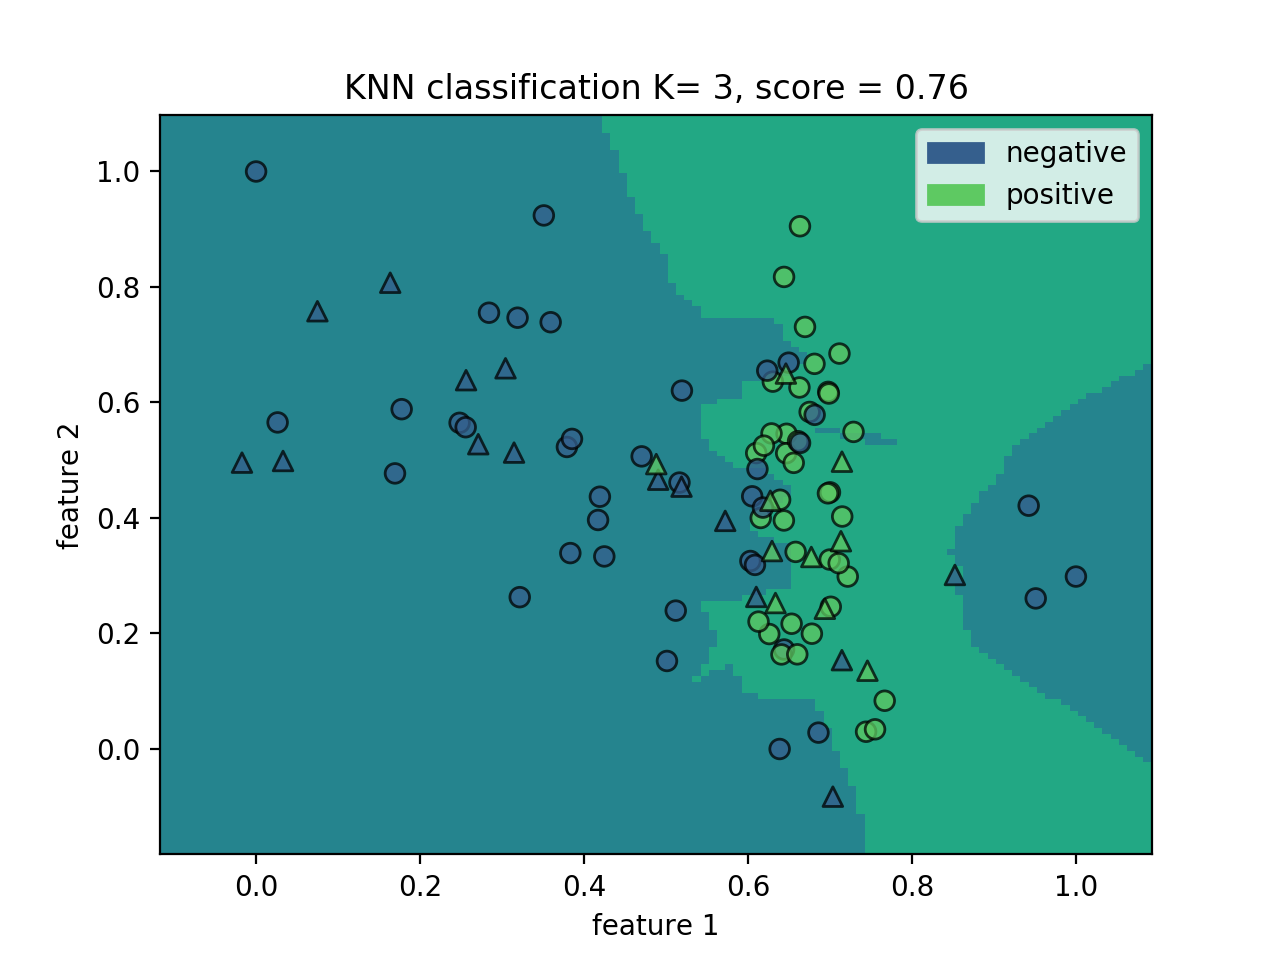

Call prediction for all grid values (precision of drawing = 0.01, you may configure to speed up e.g. precision=0.05)


<IPython.core.display.Javascript object>


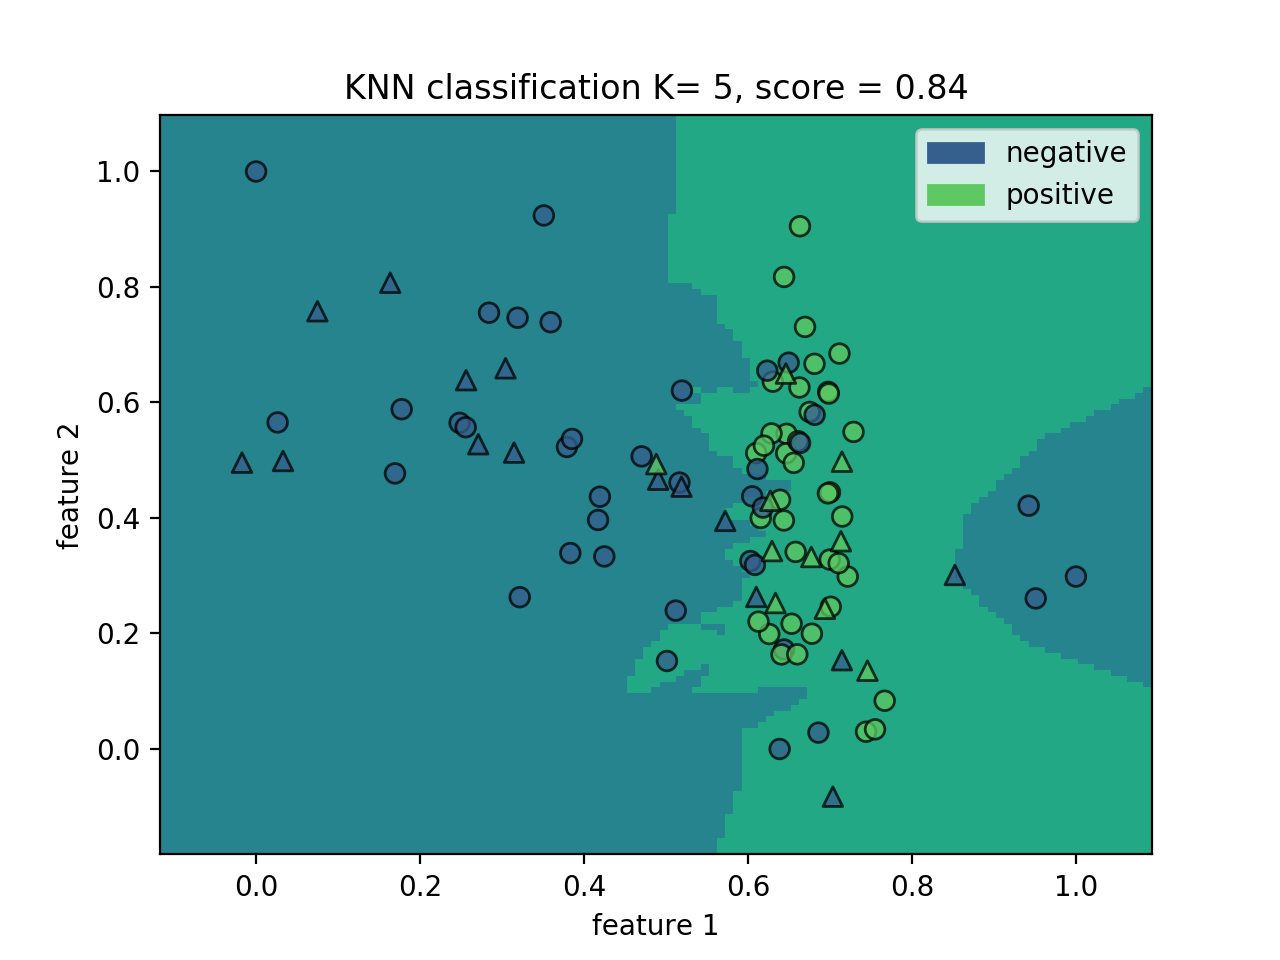

Call prediction for all grid values (precision of drawing = 0.01, you may configure to speed up e.g. precision=0.05)


<IPython.core.display.Javascript object>


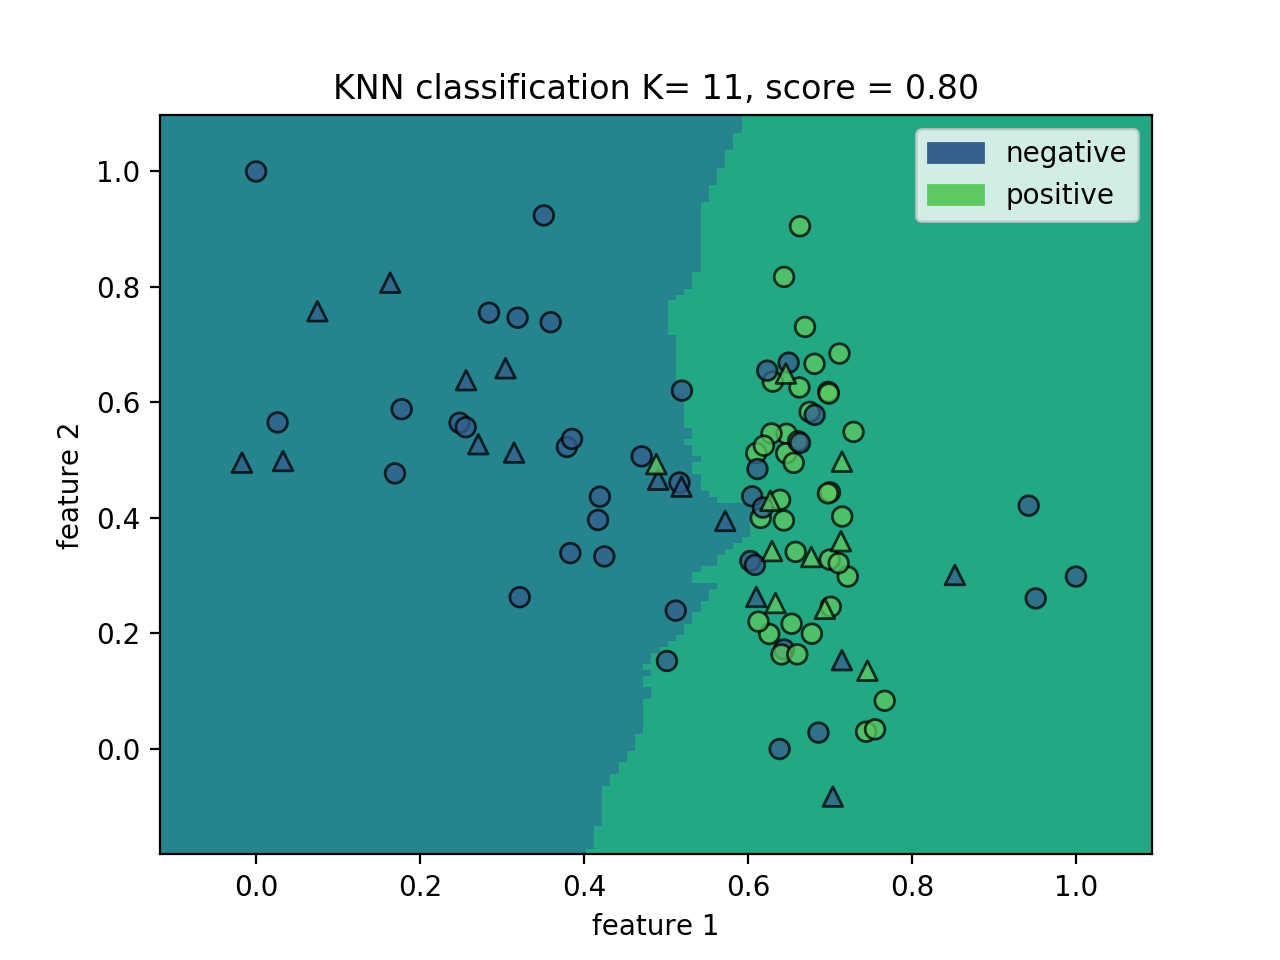

In [29]:


clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train_scaled, y_train)
score = clf.score (X_test_scaled, y_test)
mst.plot_decision_boundary(clf, X_train_scaled, y_train, X_test=X_test_scaled, y_test= y_test,
                               title='KNN classification K= {}, score = {:.2f}'.format(3, score), 
                               precision=0.01,plot_symbol_size = 50)

clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train_scaled, y_train)
score = clf.score (X_test_scaled, y_test)
mst.plot_decision_boundary(clf, X_train_scaled, y_train, X_test=X_test_scaled, y_test= y_test,
                               title='KNN classification K= {}, score = {:.2f}'.format(5, score), 
                               precision=0.01,plot_symbol_size = 50)

clf = KNeighborsClassifier(n_neighbors = 11)
clf.fit(X_train_scaled, y_train)
score = clf.score (X_test_scaled, y_test)
mst.plot_decision_boundary(clf, X_train_scaled, y_train, X_test=X_test_scaled, y_test= y_test,
                               title='KNN classification K= {}, score = {:.2f}'.format(11, score), 
                               precision=0.01,plot_symbol_size = 50)


## Regression

<font color = green >

## load data set (boston houses) 
</font>


In [58]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
# X= X[:, 5].reshape(-1,1) # test for one variable 

<font color = green >

## split to train test
</font>


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=  train_test_split(X, y, random_state=2021)
print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)
X_train[:5]

X_train.shape=  (379, 13)
y_train.shape=  (379,)


array([[6.53876e+00, 0.00000e+00, 1.81000e+01, 1.00000e+00, 6.31000e-01,
        7.01600e+00, 9.75000e+01, 1.20240e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.92050e+02, 2.96000e+00],
       [1.87000e-02, 8.50000e+01, 4.15000e+00, 0.00000e+00, 4.29000e-01,
        6.51600e+00, 2.77000e+01, 8.53530e+00, 4.00000e+00, 3.51000e+02,
        1.79000e+01, 3.92430e+02, 6.36000e+00],
       [9.82349e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.71000e-01,
        6.79400e+00, 9.88000e+01, 1.35800e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.96900e+02, 2.12400e+01],
       [8.98296e+00, 0.00000e+00, 1.81000e+01, 1.00000e+00, 7.70000e-01,
        6.21200e+00, 9.74000e+01, 2.12220e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.77730e+02, 1.76000e+01],
       [1.54450e-01, 2.50000e+01, 5.13000e+00, 0.00000e+00, 4.53000e-01,
        6.14500e+00, 2.92000e+01, 7.81480e+00, 8.00000e+00, 2.84000e+02,
        1.97000e+01, 3.90680e+02, 6.86000e+00]])

<font color = green >

## create regressor and calc score 
</font>


In [60]:
from sklearn.neighbors import KNeighborsRegressor # sklearn 

n_neighbors =5

knn_reg = KNeighborsRegressor(n_neighbors = n_neighbors).fit(X_train, y_train)
knn_reg.score(X_test, y_test)  # R2 score

0.5206620552149527

#### low score due to missed normalization 

### Apply normalization 

In [61]:
from sklearn.preprocessing import MinMaxScaler # sklearn 
scaler= MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_reg = KNeighborsRegressor(n_neighbors = n_neighbors).fit(X_train_scaled, y_train)
knn_reg.score(X_test_scaled, y_test)  # R2 score

0.7327103494659377

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


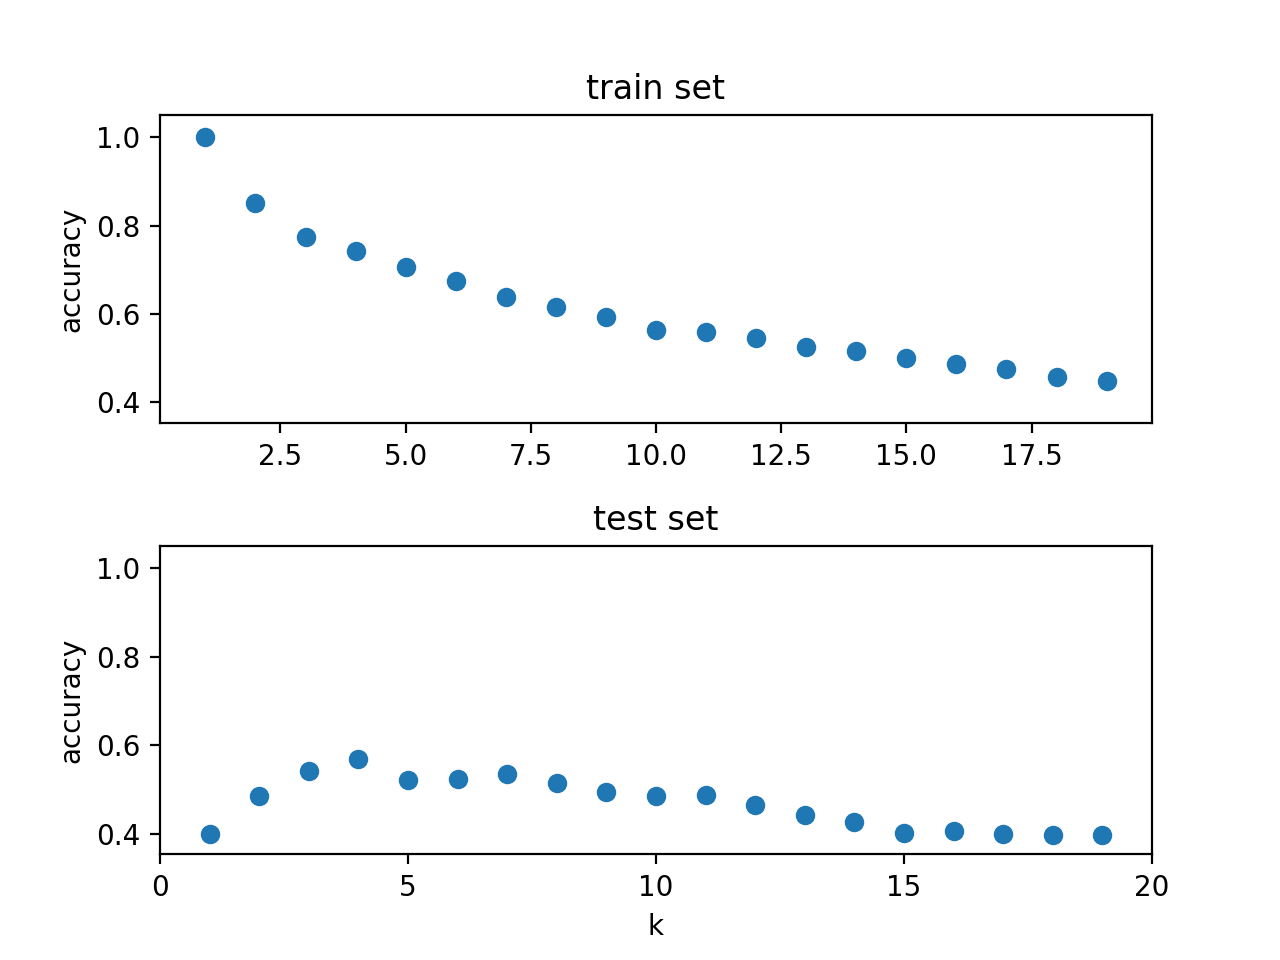

In [64]:
fig, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1, sharey=True)
k_range = range(1,20)
scores_train = []
scores_test=[]

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores_train.append(knn.score(X_train, y_train))
    scores_test.append(knn.score(X_test, y_test))


plt.sca(ax1)
plt.ylabel('accuracy')

ax1.scatter(k_range, scores_train)


plt.sca(ax2)
plt.xlabel('k')

plt.ylabel('accuracy')
ax2.scatter(k_range, scores_test)
plt.xticks([0,5,10,15,20]);
fig.subplots_adjust(hspace=.4) # set the vertical space 
ax1.set_title('train set');
ax2.set_title('test set');


### How sensitive is k-NN classification accuracy to the train/test split proportion?

<IPython.core.display.Javascript object>


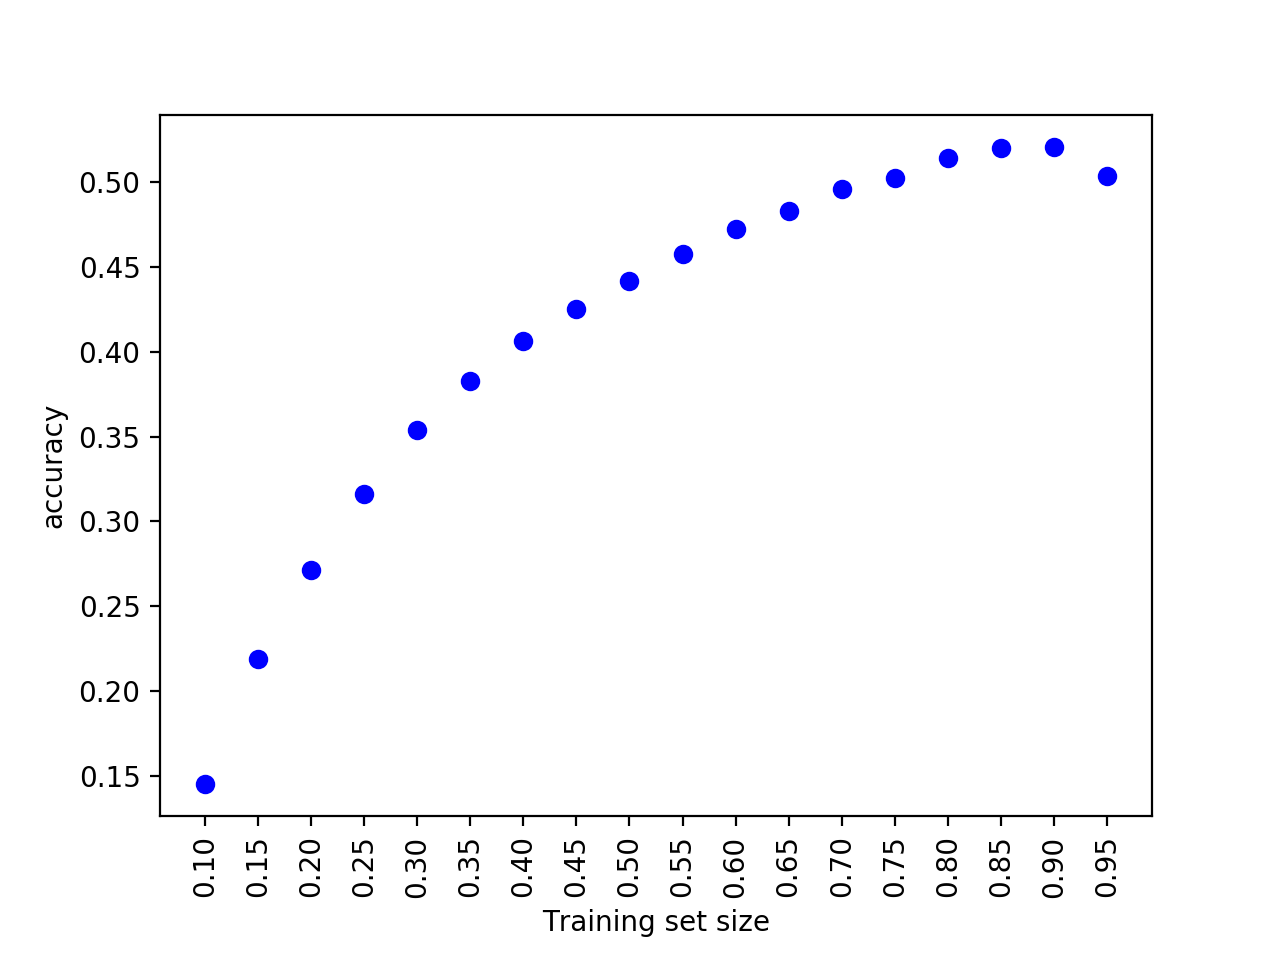

In [53]:
import numpy as np 

train_p= np.arange (0.1, 1, 0.05)
# print (train_p)

knn = KNeighborsRegressor(n_neighbors = 5)

plt.figure()

for t in train_p:
    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-t)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(t, np.mean(scores), 'bo')


plt.ylabel('accuracy');

plt.xticks(train_p, ['{:.2f}'.format(p) for p in train_p], rotation='vertical');
plt.xlabel('Training set size');
plt.subplots_adjust(bottom=0.15);


### Synthetic dataset for regression

In [32]:
import numpy as np
np.random.seed(21)
from sklearn.datasets import make_regression # sklearn
X_R1, y_R1 = make_regression(
    n_samples = 100,
    n_features=1,
    n_informative=1,
    bias = 0,
    noise = 15) 

<IPython.core.display.Javascript object>


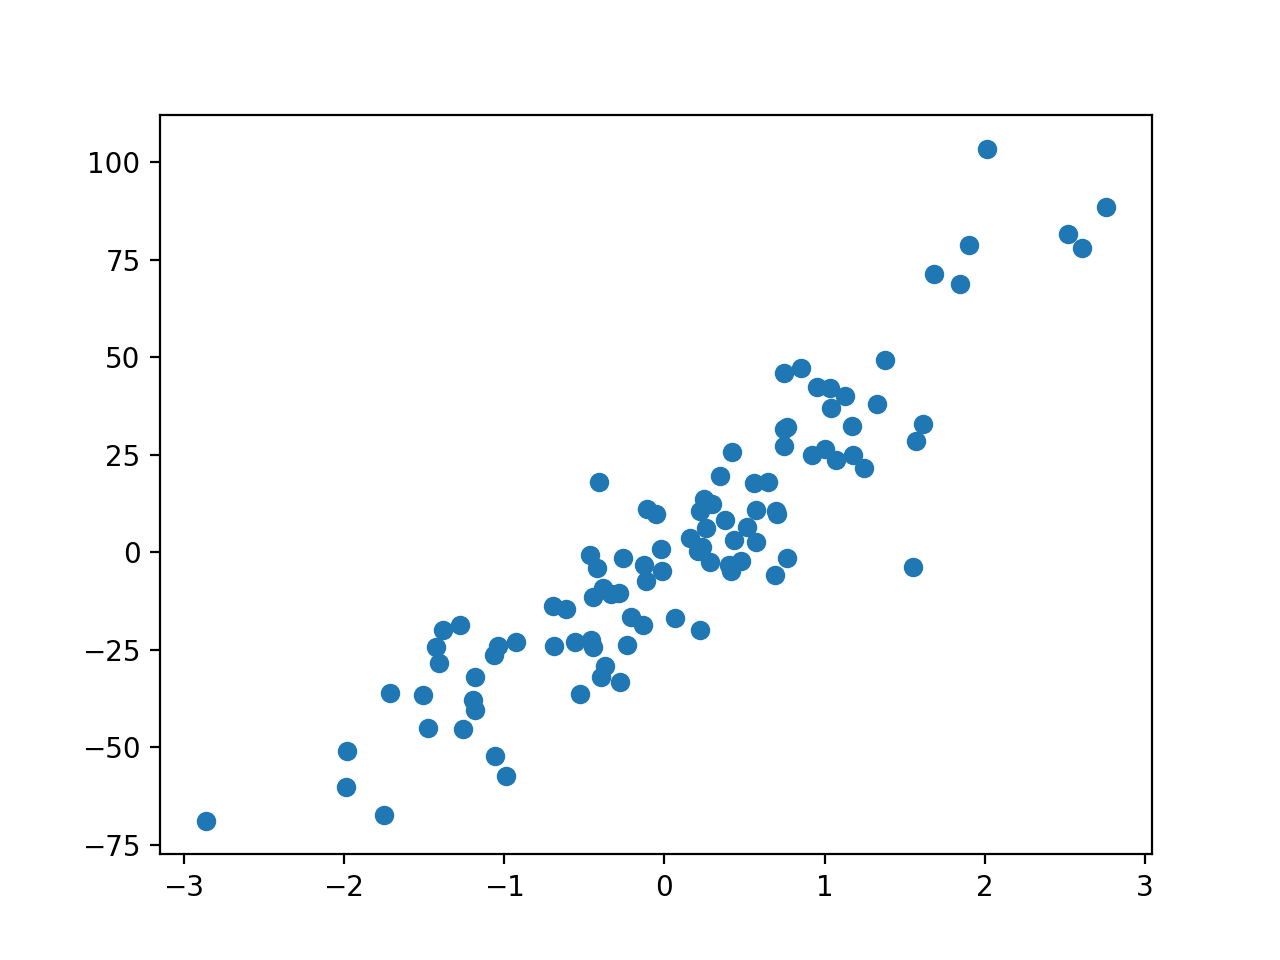

In [54]:
plt.figure()
plt.scatter(X_R1, y_R1)


<IPython.core.display.Javascript object>


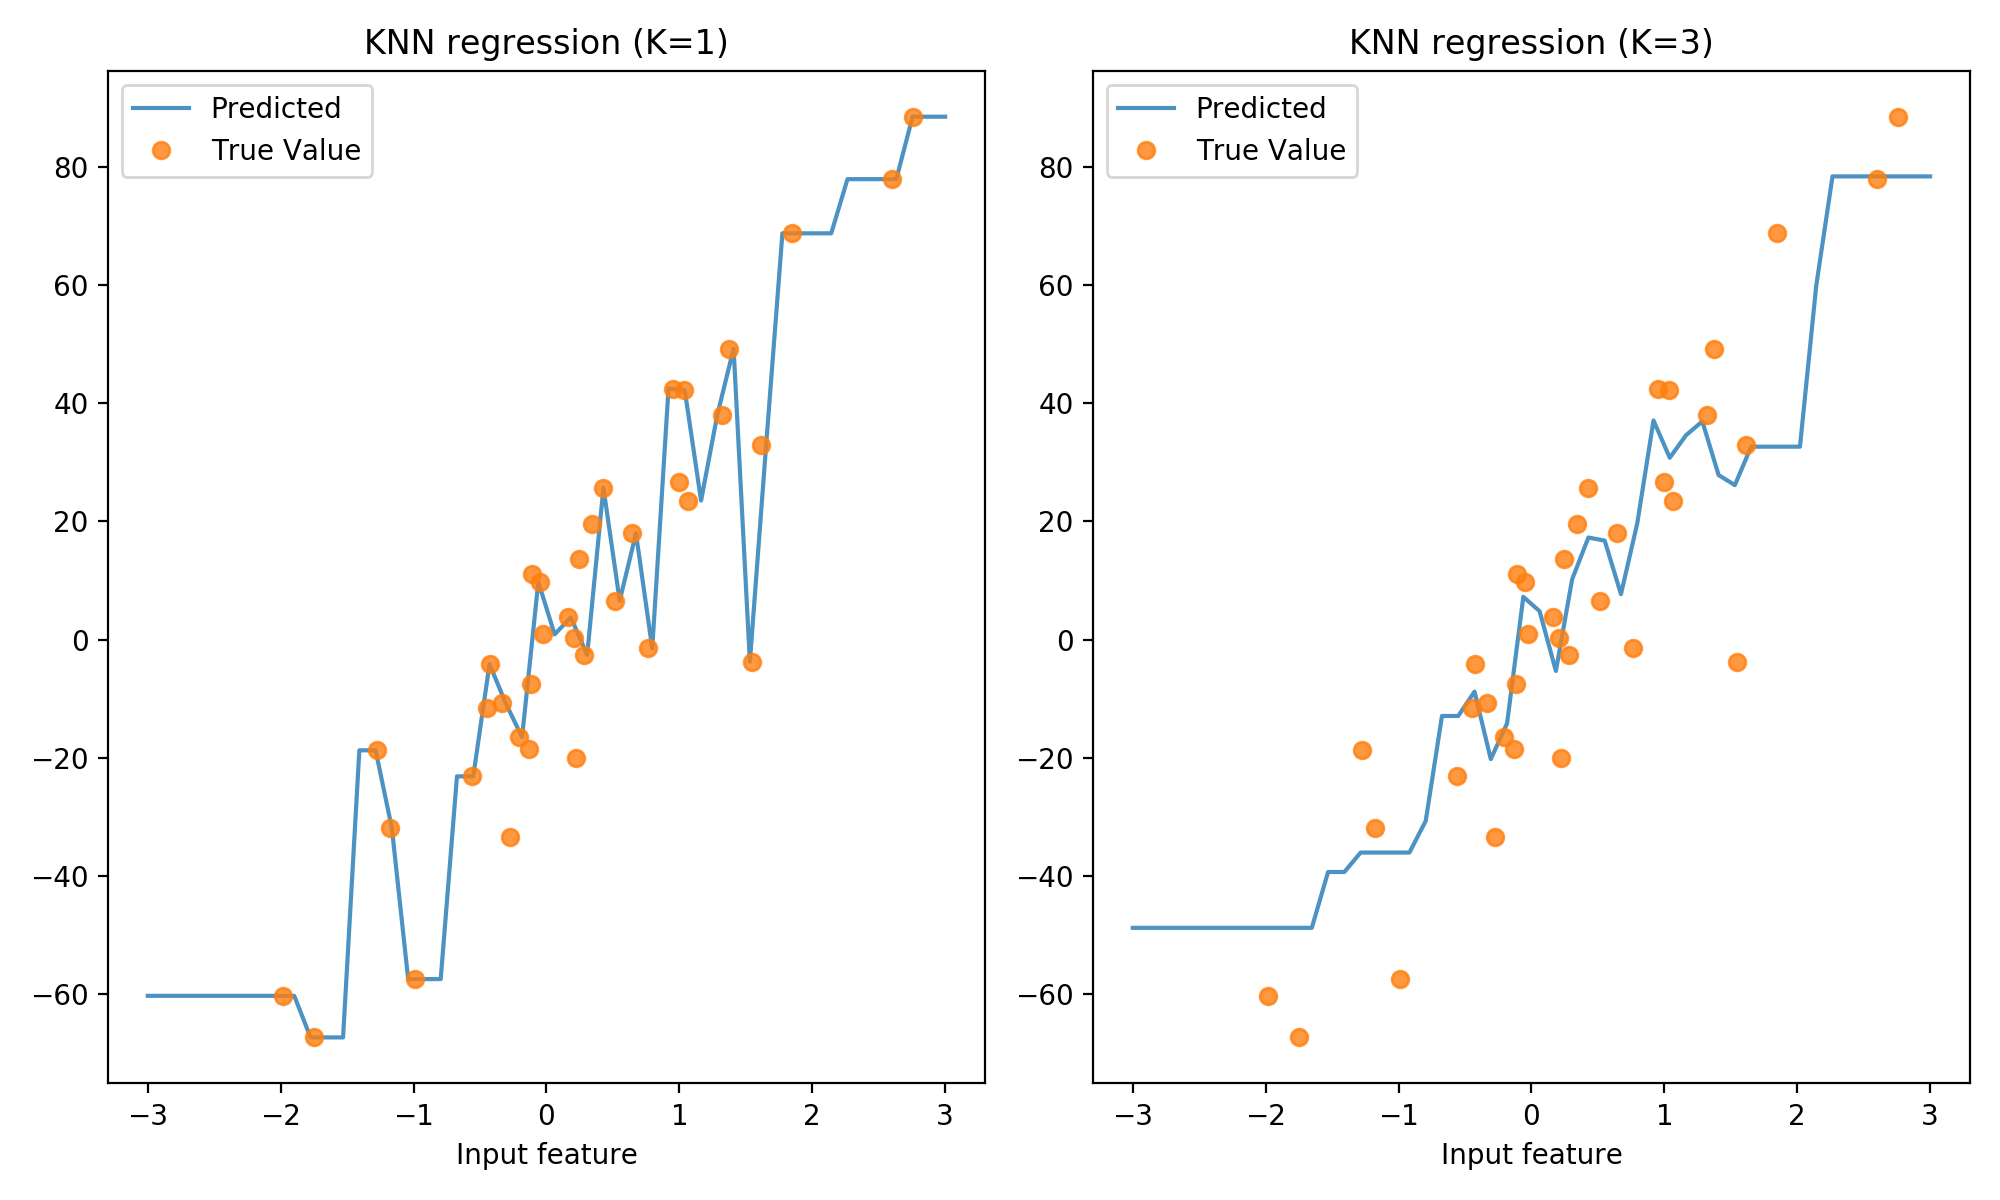

In [55]:
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib notebook

fig, subaxes = plt.subplots(1, 2, figsize=(10,6))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::2], y_R1[0::2], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
#     thisaxis.set_xlim([-2, 1])
    thisaxis.plot(X_predict_input, y_predict_output, '-', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
#     thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

### Apply KNN for synthetic data set  

### Regression model complexity as a function of K

<IPython.core.display.Javascript object>


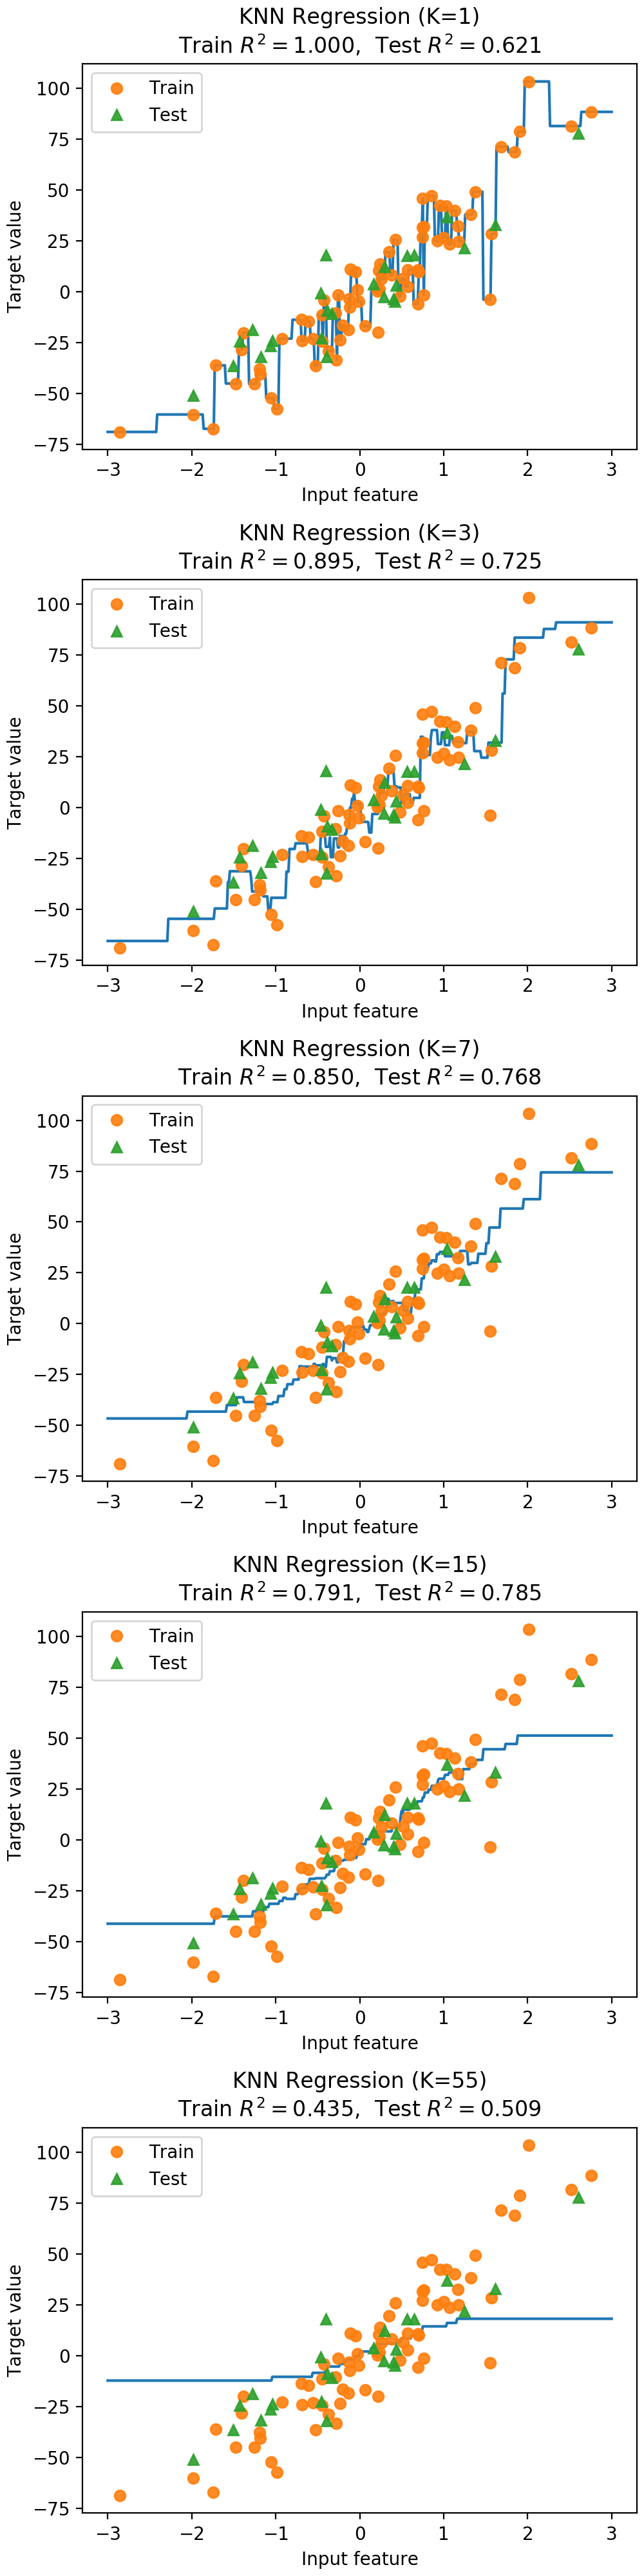

In [56]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

## Sklearn overview  

Used so far already: 

```python
# from sklearn.utils import shuffle # sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.datasets import make_regression 
from sklearn.datasets import make_classification

```


# Home task : KNN classification


1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set
    

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 





## `Iris` dataset 

In [2]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [3]:
k_best = None # 'compute the best k'
score_best = None #'compute the best score'
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = None , score = None


## Synthetic dataset  

<IPython.core.display.Javascript object>


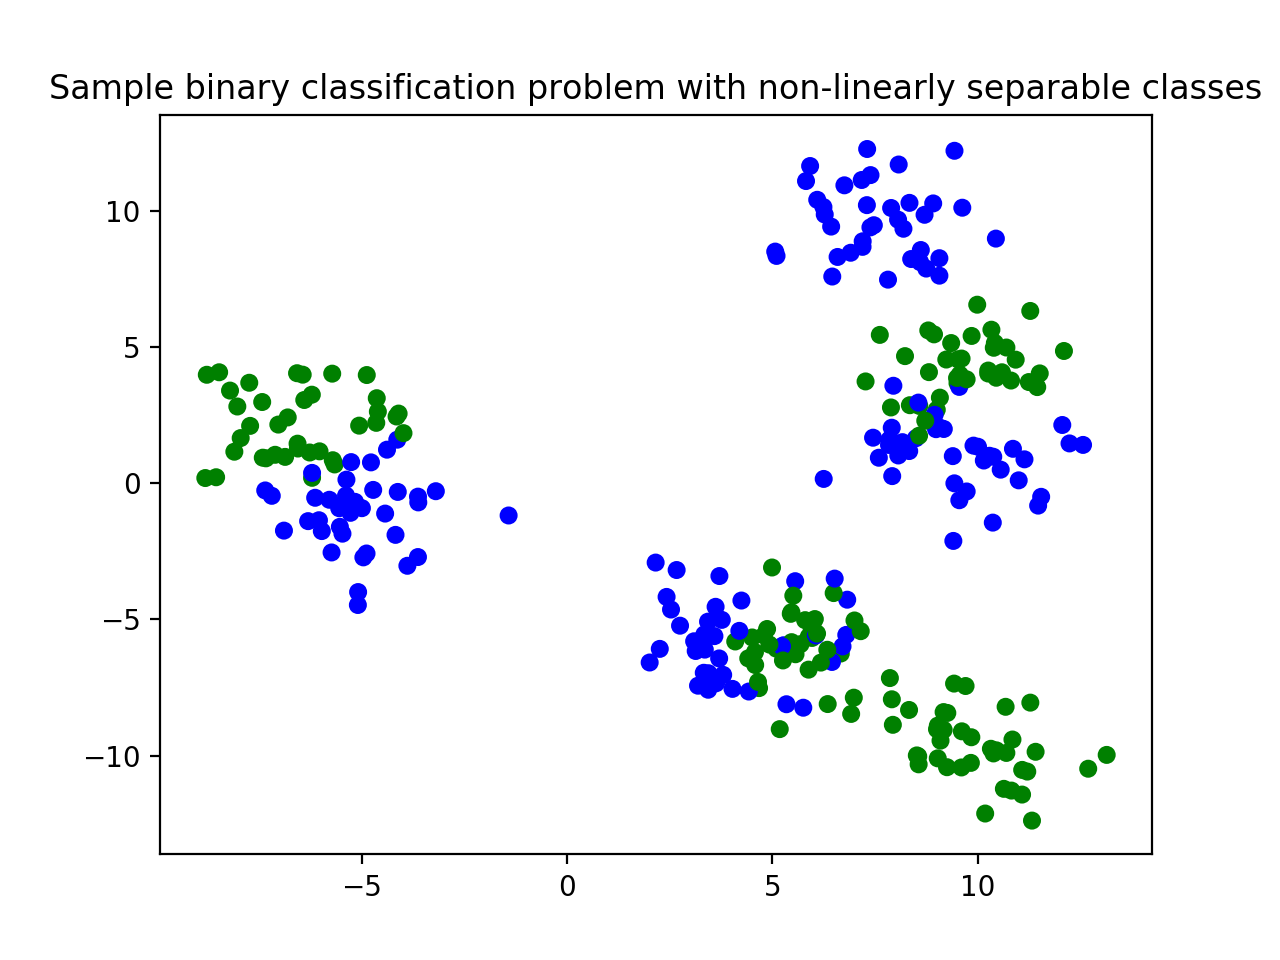

In [7]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)



In [216]:
k_best = None # 'compute the best k'
score_best = None #'compute the best score'
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 18 , score = 0.9466666666666667


In [8]:
# visualize decision boundary 